In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data


In [5]:
data=pd.read_csv("data.csv",encoding='unicode_escape', low_memory=False)

In [7]:
cd=data.copy()

In [9]:
cd.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [10]:
cd.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore and Clean the Data

In [13]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [16]:
cd.shape

(435742, 13)

In [15]:
cd.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [18]:
cd['date'] = pd.to_datetime(cd['date'], format="%Y-%m-%d", errors='coerce')
cd['date'].head(20)


0    1990-02-01
1    1990-02-01
2    1990-02-01
3    1990-03-01
4    1990-03-01
5    1990-03-01
6    1990-04-01
7    1990-04-01
8    1990-04-01
9    1990-05-01
10   1990-05-01
11   1990-06-01
12   1990-06-01
13   1990-06-01
14   1990-07-01
15   1990-07-01
16   1990-07-01
17   1990-08-01
18   1990-08-01
19   1990-08-01
Name: date, dtype: datetime64[ns]

In [20]:
print(cd['date'].dtype)

datetime64[ns]


In [21]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     435739 non-null  object        
 4   agency                       286261 non-null  object        
 5   type                         430349 non-null  object        
 6   so2                          401096 non-null  float64       
 7   no2                          419509 non-null  float64       
 8   rspm                         395520 non-null  float64       
 9   spm                          198355 non-null  float64       
 10  location_monitoring_station  408251 non-null  object        
 11  pm2_5                     

In [22]:
del cd['agency']
del cd['location_monitoring_station']
del cd['stn_code']
del cd['sampling_date']

In [25]:
print(cd['type'].isnull().sum())
cd=cd.dropna(axis=0,subset=["type"])
print(cd['type'].isnull().sum())

5393
0


In [27]:
cd['so2'].isnull().sum()
cd=cd.dropna(axis=0,subset=["type"])
cd['type'].isnull().sum()
cd.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,1990-05-01


In [29]:
cd['no2'].isnull().sum()
cd=cd.dropna(axis=0,subset=["no2"])
cd['no2'].isnull().sum()
cd.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,1990-05-01


In [31]:
cd['rspm'].isnull().sum()
cd=cd.dropna(axis=0,subset=["rspm"])
cd['rspm'].isnull().sum()
cd.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
1036,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,370.7,NaN,2004-02-01
1037,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,285.7,NaN,2004-05-01
1038,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,221.3,NaN,2004-09-01
1039,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,186.7,NaN,2004-12-01
1040,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,270.7,NaN,2004-01-16
1041,Andhra Pradesh,Hyderabad,Industrial Area,6.9,134.1,101.7,235.0,NaN,2004-01-19
1042,Andhra Pradesh,Hyderabad,Industrial Area,6.2,41.6,84.7,219.3,NaN,2004-01-23
1043,Andhra Pradesh,Hyderabad,Industrial Area,6.3,45.7,93.7,222.3,NaN,2004-01-27
1044,Andhra Pradesh,Hyderabad,Industrial Area,6.1,79.5,55.7,182.3,NaN,2004-01-30
1045,Andhra Pradesh,Hyderabad,Industrial Area,5.2,41.6,60.3,157.7,NaN,2004-03-02


In [33]:
cd['spm'].isnull().sum()
cd=cd.dropna(axis=0,subset=["spm"])
cd['spm'].isnull().sum()
cd.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
1036,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,370.7,NaN,2004-02-01
1037,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,285.7,NaN,2004-05-01
1038,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,221.3,NaN,2004-09-01
1039,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,186.7,NaN,2004-12-01
1040,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,270.7,NaN,2004-01-16
1041,Andhra Pradesh,Hyderabad,Industrial Area,6.9,134.1,101.7,235.0,NaN,2004-01-19
1042,Andhra Pradesh,Hyderabad,Industrial Area,6.2,41.6,84.7,219.3,NaN,2004-01-23
1043,Andhra Pradesh,Hyderabad,Industrial Area,6.3,45.7,93.7,222.3,NaN,2004-01-27
1044,Andhra Pradesh,Hyderabad,Industrial Area,6.1,79.5,55.7,182.3,NaN,2004-01-30
1045,Andhra Pradesh,Hyderabad,Industrial Area,5.2,41.6,60.3,157.7,NaN,2004-03-02


In [ ]:
del cd["pm2_5"]

In [37]:
cd.columns


Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [40]:
cd.head()

,state,location,type,so2,no2,rspm,spm,date
1036,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,370.7,2004-02-01
1037,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,285.7,2004-05-01
1038,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,221.3,2004-09-01
1039,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,186.7,2004-12-01
1040,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,270.7,2004-01-16


In [42]:
cd.to_csv('Cleaned.csv',index=False)

# counting the type of type of cd

In [43]:
a=list(cd['type'])
for i in range(0,len(cd)):
    if str(a[i][0])=='I' and a[i][1]=='n':
        a[i]="Industrail"
    elif str(a[i][0])=="R"and a[i][1]=='e':
        a[i]="Residential"
    else:
        a[i]="other"
        
cd['type'] = a
cd['type'].value_counts()

type
Residential    96601
Industrail     56612
other           5539
Name: count, dtype: int64

In [45]:
cd.head(20)

,state,location,type,so2,no2,rspm,spm,date
1036,Andhra Pradesh,Hyderabad,Industrail,12.9,55.8,143.7,370.7,2004-02-01
1037,Andhra Pradesh,Hyderabad,Industrail,10.4,48.9,124.7,285.7,2004-05-01
1038,Andhra Pradesh,Hyderabad,Industrail,7.6,50.1,88.0,221.3,2004-09-01
1039,Andhra Pradesh,Hyderabad,Industrail,7.3,48.5,82.7,186.7,2004-12-01
1040,Andhra Pradesh,Hyderabad,Industrail,6.8,110.3,122.3,270.7,2004-01-16
1041,Andhra Pradesh,Hyderabad,Industrail,6.9,134.1,101.7,235.0,2004-01-19
1042,Andhra Pradesh,Hyderabad,Industrail,6.2,41.6,84.7,219.3,2004-01-23
1043,Andhra Pradesh,Hyderabad,Industrail,6.3,45.7,93.7,222.3,2004-01-27
1044,Andhra Pradesh,Hyderabad,Industrail,6.1,79.5,55.7,182.3,2004-01-30
1045,Andhra Pradesh,Hyderabad,Industrail,5.2,41.6,60.3,157.7,2004-03-02


C:\Users\hp\AppData\Local\Temp\ipykernel_12176\323195240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = cd)


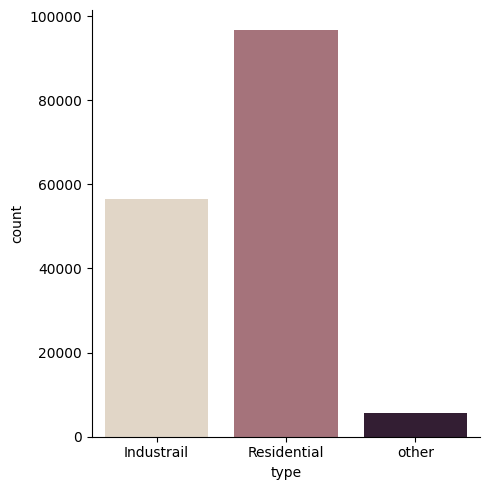

In [47]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = cd)

<Axes: xlabel='location'>

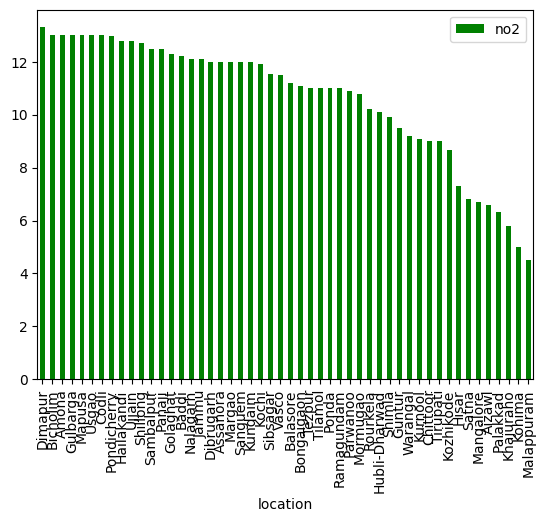

In [54]:
cd[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

so2     1.595577e+06
no2     4.331986e+06
rspm    1.704338e+07
spm     3.507452e+07
dtype: float64


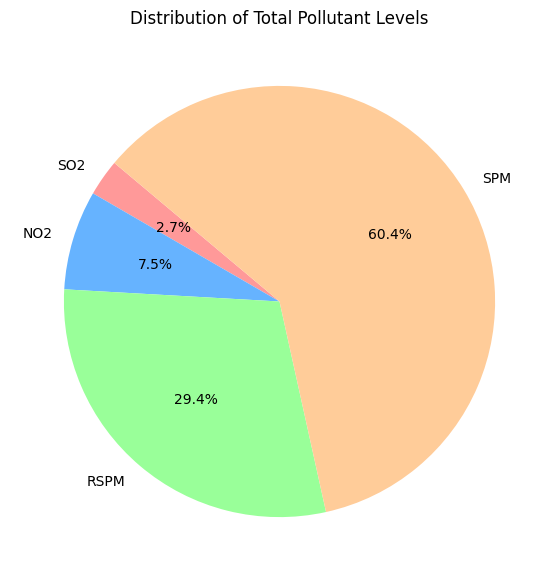

In [56]:
total_levels = cd[['so2', 'no2', 'rspm', 'spm']].sum()
print(total_levels)
total_levels = {
    'SO2': 1.595577e+06,
    'NO2': 4.331986e+06,
    'RSPM': 1.704338e+07,
    'SPM': 3.507452e+07
}

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(total_levels.values(), labels=total_levels.keys(), autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Total Pollutant Levels')
plt.show()

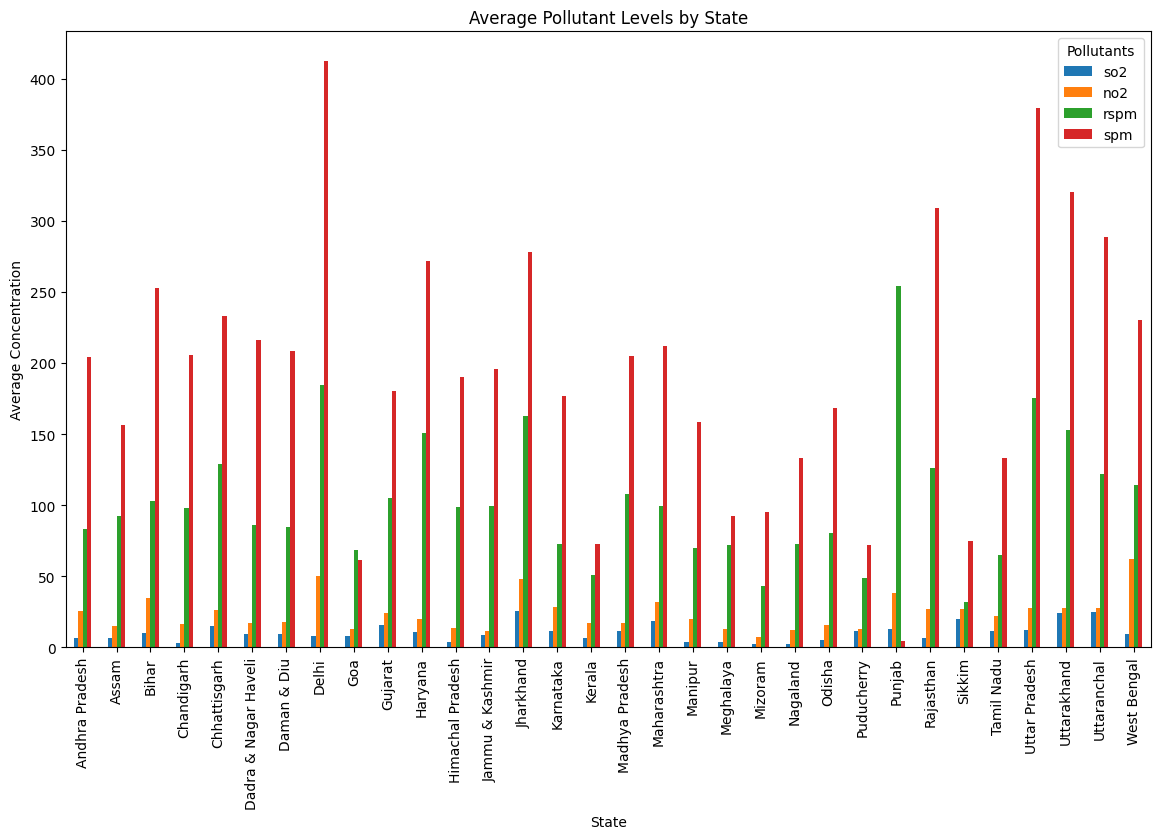

In [58]:

# Group by state and calculate average levels
state_avg = cd.groupby('state')[['so2', 'no2', 'rspm', 'spm']].mean()

# Plot average levels by state
state_avg.plot(kind='bar', figsize=(14, 8))
plt.xlabel('State')
plt.ylabel('Average Concentration')
plt.title('Average Pollutant Levels by State')
plt.xticks(rotation=90)
plt.legend(title='Pollutants')
plt.show()


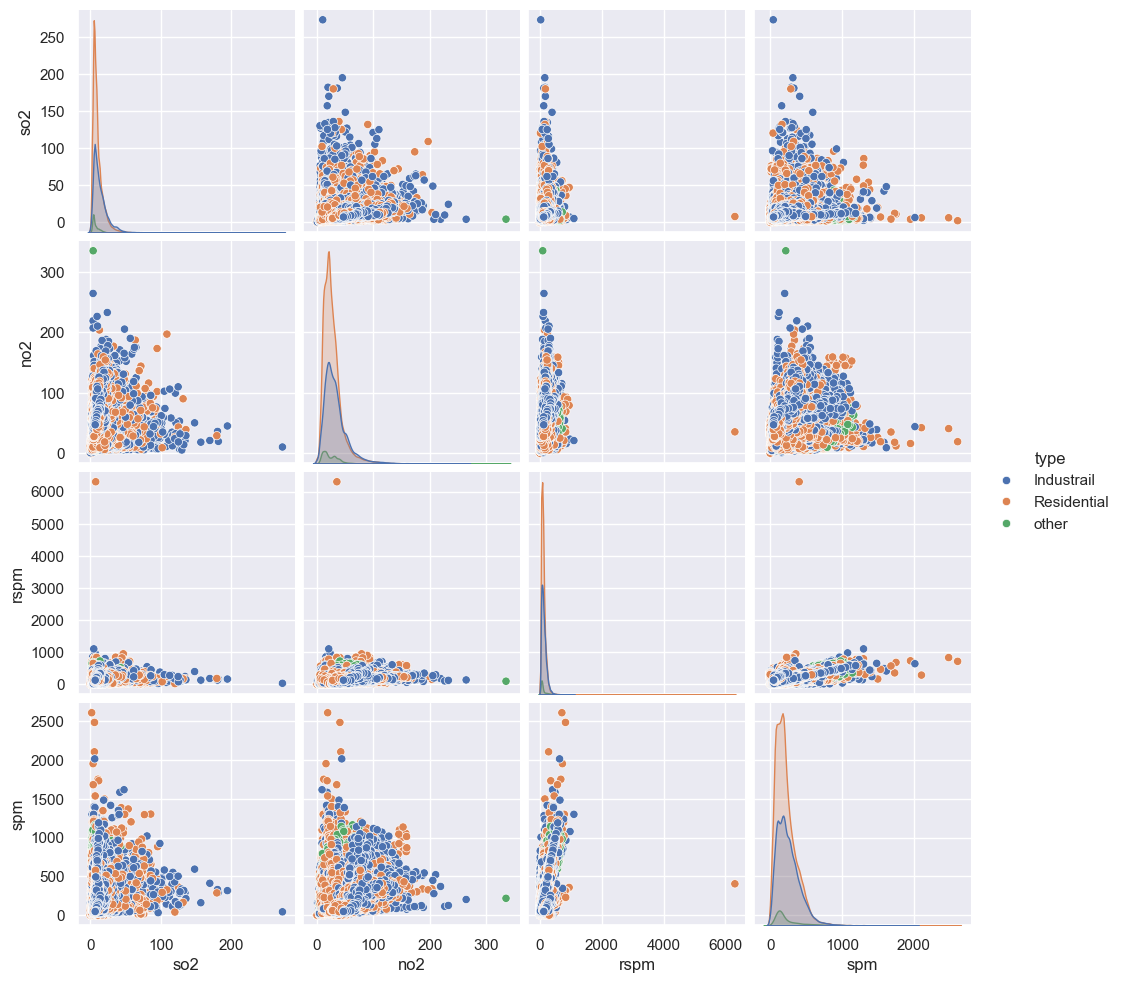

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
cols = ['so2', 'no2', 'rspm', 'spm']
sns.pairplot(cd[cols + ['type']].dropna(), hue='type', height=2.5)
plt.show()


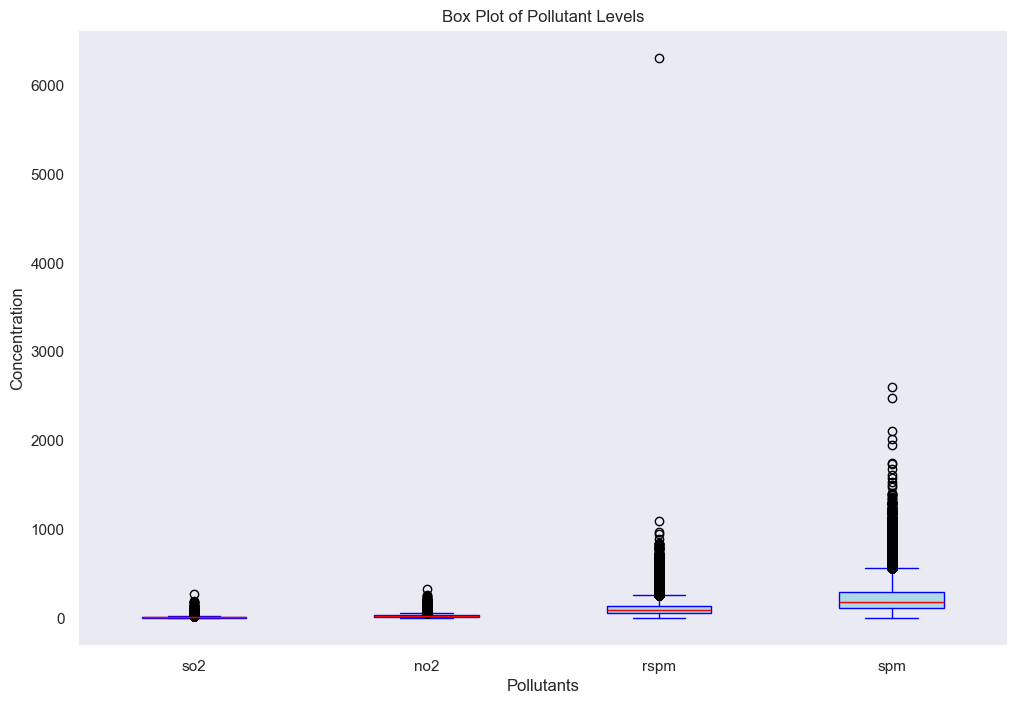

In [60]:
plt.figure(figsize=(12, 8))
cd[['so2', 'no2', 'rspm', 'spm']].boxplot(grid=False, patch_artist=True, 
                                          boxprops=dict(facecolor='lightblue', color='blue'),
                                          whiskerprops=dict(color='blue'),
                                          capprops=dict(color='blue'),
                                          medianprops=dict(color='red'))
plt.title('Box Plot of Pollutant Levels')
plt.ylabel('Concentration')
plt.xlabel('Pollutants')
plt.show()


# rspm level is so high so now we will check rspm distribution by state

C:\Users\hp\AppData\Local\Temp\ipykernel_12176\263844526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='rspm', data=state_rspm, palette='viridis')


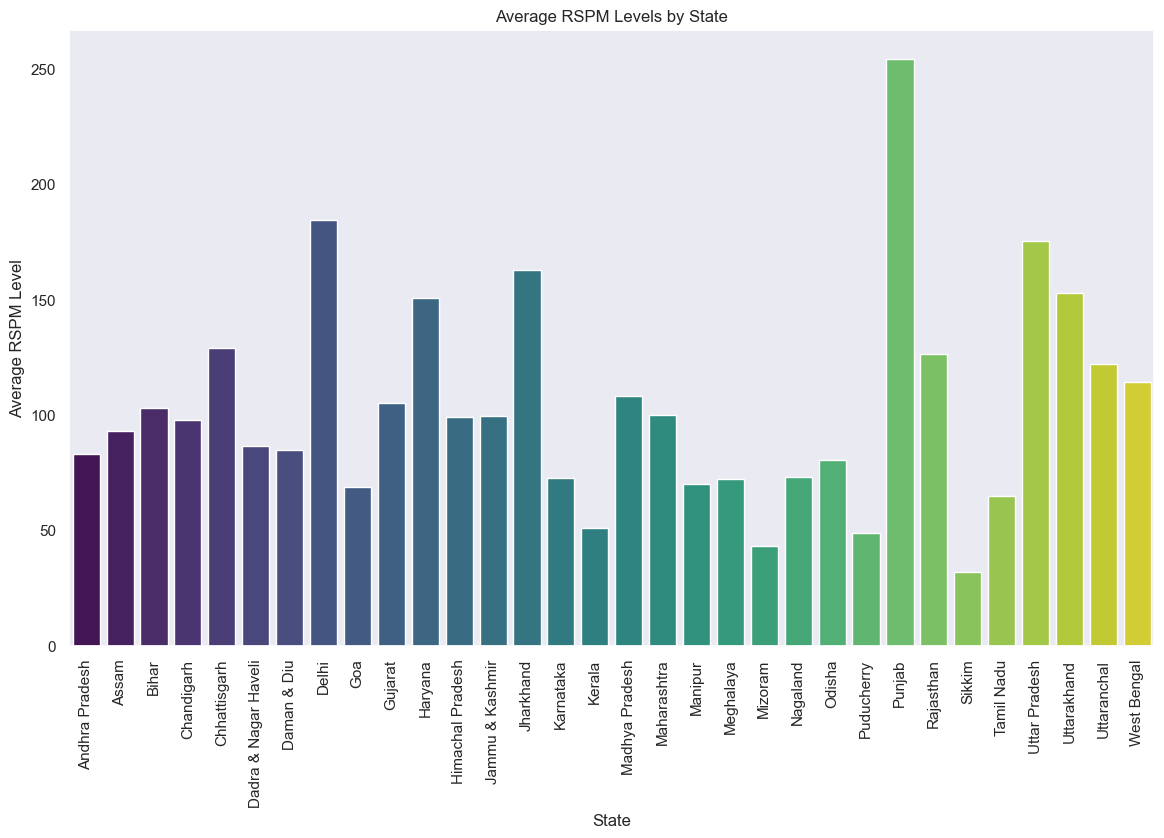

In [62]:
# Calculate average RSPM levels by state
state_rspm = cd.groupby('state')['rspm'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='rspm', data=state_rspm, palette='viridis')
plt.xlabel('State')
plt.ylabel('Average RSPM Level')
plt.title('Average RSPM Levels by State')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.grid(axis='y')
plt.show()